In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

seed = 0

import itertools
from sklearn.model_selection import KFold

train = pd.read_csv('/Users/markun/SIGNATE/heart/train.csv')
test = pd.read_csv('/Users/markun/SIGNATE/heart/test.csv')
sample = pd.read_csv('/Users/markun/SIGNATE/heart/sample_submission.csv')

In [2]:
train

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1987,60,0,2794,0,25,0,265544.8657,0.833913,136,1,0,213,0
996,1988,50,1,84,1,40,0,256092.9711,0.708992,138,1,0,213,0
997,1994,51,1,81,0,45,1,280249.0532,0.781721,137,1,0,63,0
998,1996,76,1,553,0,50,0,187570.8939,0.855810,137,1,0,115,1


In [3]:
test

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,67,1,56,0,60,0,255844.0310,0.824480,140,0,0,147
1,2,58,0,320,0,38,0,163434.8513,5.281481,134,0,0,207
2,4,67,1,737,0,60,0,255278.8436,0.841388,140,0,0,113
3,5,48,0,231,1,60,0,500149.7955,0.742807,139,1,1,215
4,6,59,0,320,0,35,0,245489.2530,1.082861,132,1,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1992,52,1,582,0,45,1,272303.4409,0.840646,136,1,0,209
996,1993,51,0,130,1,35,0,270252.4419,0.858651,136,0,0,186
997,1995,59,0,132,0,38,0,271631.9731,0.880883,141,1,0,33
998,1997,61,0,582,0,60,0,265879.0010,0.932744,139,1,0,207


In [4]:
sample

,1,0
0,2,0
1,4,0
2,5,0
3,6,0
4,8,0
...,...,...
994,1992,0
995,1993,0
996,1995,0
997,1997,0


In [5]:
train_x = train.drop(['target'], axis = 1)

In [6]:
train_y = train['target']

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y,
                                                        test_size=0.2,
                                                        shuffle=True,
                                                        random_state=42,
                                                        stratify=train_y)
kfold = model_selection.KFold(n_splits = 5)
scores = {}

In [10]:
# ロジスティック回帰
lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(lr_clf, X_valid, y_valid, cv = kfold) 
scores[('1.Logistic_regression', 'train_score')] = results.mean()
scores[('1.Logistic_regression', 'test_score')] = lr_clf.score(X_valid, y_valid)

# 決定木
dtc_clf = DecisionTreeClassifier(random_state=seed)
dtc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(dtc_clf, X_valid, y_valid, cv = kfold) 
scores[('2.decision_tree', 'train_score')] = results.mean()
scores[('2.decision_tree', 'test_score')] = dtc_clf.score(X_valid, y_valid)

# サポートベクターマシン（SVM）
svm_clf = SVC(probability=True, random_state=seed)
svm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(svm_clf, X_valid, y_valid, cv = kfold) 
scores[('3.SVM', 'train_score')] = results.mean()
scores[('3.SVM', 'test_score')] = svm_clf.score(X_valid, y_valid)

# AdaBoost
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=seed)
adb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(adb_clf, X_valid, y_valid, cv = kfold) 
scores[('4.AdaBoost', 'train_score')] = results.mean()
scores[('4.AdaBoost', 'test_score')] = adb_clf.score(X_valid, y_valid)

# GradientBoosting (GBM)
gbm_clf = GradientBoostingClassifier(random_state=seed)
gbm_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(gbm_clf, X_valid, y_valid, cv = kfold) 
scores[('5.GBM', 'train_score')] = results.mean()
scores[('5.GBM', 'test_score')] = gbm_clf.score(X_valid, y_valid)

# ランダムフォレスト
rfc_clf = RandomForestClassifier(max_depth=7, random_state=seed)
rfc_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(rfc_clf, X_valid, y_valid, cv = kfold) 
scores[('6.Random Forest', 'train_score')] = results.mean()
scores[('6.Random Forest', 'test_score')] = rfc_clf.score(X_valid, y_valid)

# xgboost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
results = model_selection.cross_val_score(xgb_clf, X_valid, y_valid, cv = kfold) 
scores[('7.xgboost', 'train_score')] = results.mean()
scores[('7.xgboost', 'test_score')] = xgb_clf.score(X_valid, y_valid)


# バギングアンサンブル
estimators=[('lr', lr_clf), ('dtc', dtc_clf), ('svc', svm_clf),('xgb',xgb_clf),('rfc',rfc_clf),('gbm',gbm_clf),('adb',adb_clf)]
vote_clf=VotingClassifier(estimators=estimators, voting='hard')
pred = vote_clf.fit(X_train, y_train).predict(test)
results = model_selection.cross_val_score(vote_clf, X_valid, y_valid, cv = kfold) 
scores[('8.Max_voting', 'train_score')] = results.mean()
scores[('8.Max_voting', 'test_score')] = vote_clf.score(X_valid, y_valid)

pd.Series(scores).unstack()

,test_score,train_score
1.Logistic_regression,0.805,0.785
2.decision_tree,0.755,0.715
3.SVM,0.800,0.800
4.AdaBoost,0.840,0.735
5.GBM,0.850,0.765
6.Random Forest,0.825,0.815
7.xgboost,0.840,0.760
8.Max_voting,0.835,0.805


In [11]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

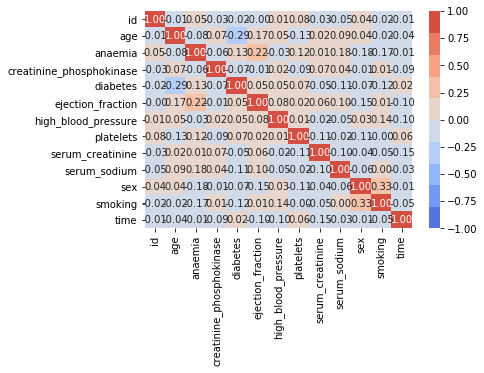

In [19]:
import seaborn as sns
columns = train_x[['id','age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']].corr()
sns.heatmap(columns, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [13]:
submission_xgb_en = pd.DataFrame({
    'index':test['id'],
    'target':pred, 
})
submission_xgb_en.to_csv('/Users/markun/SIGNATE/heart/submission_xgb_en.csv', header = False, index = False )

In [14]:
submission_xgb_en

,index,target
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
995,1992,0
996,1993,0
997,1995,0
998,1997,0
